After noticing that outputs of merged_results differ sometimes although the preprocessing and the data are the same, I want to examine if this is true and what is it caused by

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
old_path = "/home/icb/eirini.giannakoulia/pipeline/data/reports/vitatrack/merged_results.tsv"
new_path = "/lustre/groups/ml01/workspace/eirini.giannakoulia/pipeline/data/reports/vitatrack/merged_results.tsv"

In [48]:
import scanpy as sc

/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead

In [65]:
adata_rna = sc.read_h5ad("/lustre/groups/ml01/workspace/eirini.giannakoulia/datasets/V11L12-038/V11L12-038_A1/V11L12-038_A1.RNA_MOSCOT_paired_hvg.h5ad")
adata_rna

AnnData object with n_obs × n_vars = 2681 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'technology', 'split'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [57]:
adata_msi = sc.read_h5ad("/lustre/groups/ml01/workspace/eirini.giannakoulia/datasets/V11L12-038/V11L12-038_A1/V11L12-038_A1.MSI_MOSCOT_paired_hvg.h5ad")
adata_msi

AnnData object with n_obs × n_vars = 2681 × 500
    obs: 'technology', 'clusters', 'split', 'og_index'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

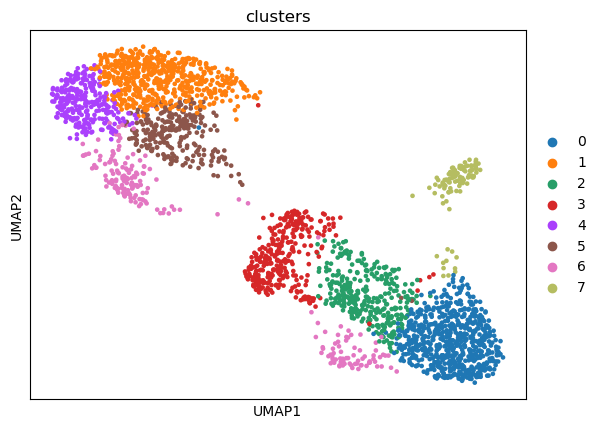

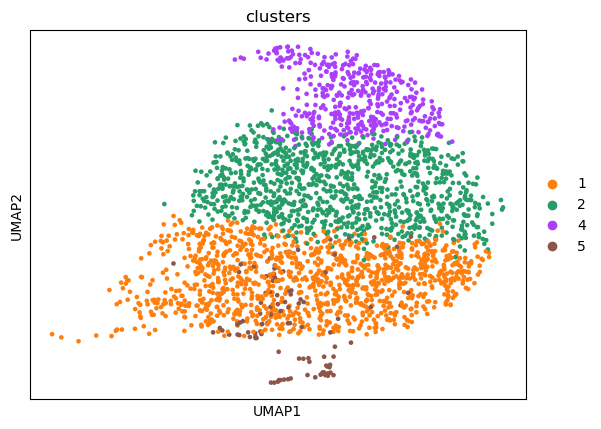

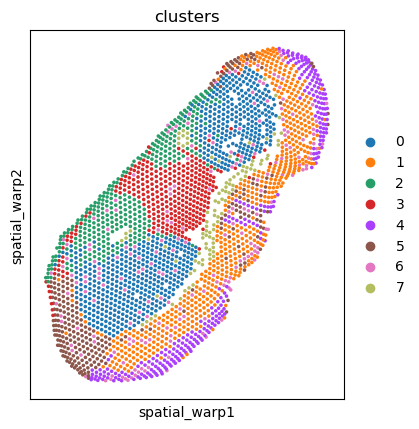

In [67]:
sc.pl.umap(adata_rna, color='clusters')
sc.pl.umap(adata_msi, color='clusters')
sc.pl.spatial(adata_rna, img_key=None, color="clusters", size=.002, basis='spatial_warp')
# sc.pl.spatial(adata_msi, img_key="hires", color="clusters", spot_size=1, basis='spatial_warp')


In [23]:
old_df = pd.read_csv(old_path, sep="\t")
new_df = pd.read_csv(new_path, sep="\t")

In [24]:
old_df

,rmse,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,4.573726,-1.637248,0.641744,0.739255,vitatrack,ridge,hvg,{'alpha': 1.0},4ab9d83892
1,6.697582,-4.621875,0.484215,0.620086,vitatrack,ridge,hvg,{'alpha': 0.1},21a5b4d24f
2,2.750613,0.031418,0.838006,0.898839,vitatrack,ridge,hvg_svd,{'alpha': 1.0},2e0c7cb919
3,2.750686,0.031374,0.837995,0.898830,vitatrack,ridge,hvg_svd,{'alpha': 0.1},87035beb50
4,2.755110,0.023032,0.837643,0.898854,vitatrack,ridge,hvg_svd_graph,{'alpha': 1.0},fb86aaa786
...,...,...,...,...,...,...,...,...,...
70,3.837974,-2.769409,0.786271,0.839365,vitatrack,cvae,svd_graph,"{'hidden_dim': 384, 'latent_dim': 30, 'lr': 0....",edd659c3b1
71,6.742153,-121.357971,0.652446,0.709733,vitatrack,cvae,svd_graph,"{'hidden_dim': 256, 'latent_dim': 40, 'lr': 0....",eb31c9169a
72,3.879876,-3.913573,0.781123,0.832165,vitatrack,cvae,svd_graph,"{'hidden_dim': 512, 'latent_dim': 30, 'lr': 0....",3a08c12f85
73,7.781340,-176.473328,0.630963,0.684775,vitatrack,cvae,svd_graph,"{'hidden_dim': 1024, 'latent_dim': 100, 'lr': ...",f38e4a8d05


In [25]:
common_hashes = set(old_df["hash"]).intersection(set(new_df["hash"]))
len(common_hashes)


75

In [26]:
old_common = old_df[old_df["hash"].isin(common_hashes)].set_index("hash")
new_common = new_df[new_df["hash"].isin(common_hashes)].set_index("hash")


Generate heatmap to see where the values differ the most

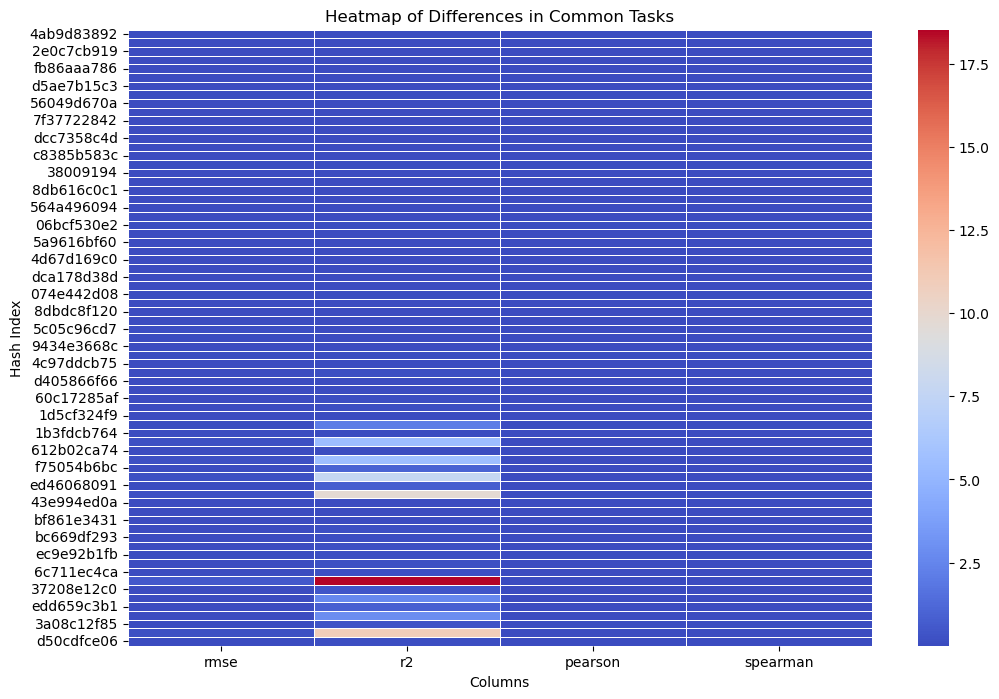

In [27]:
# Select only numeric columns
numeric_cols = old_common.select_dtypes(include=["number"]).columns

# Compute absolute differences for numeric columns
diff_values = (old_common[numeric_cols] - new_common[numeric_cols]).abs()

# Filter only rows where there are differences
diff_values_filtered = diff_values.loc[diff_values.any(axis=1)]

# Plot heatmap to visualize the differences
plt.figure(figsize=(12, 8))
sns.heatmap(diff_values_filtered, cmap="coolwarm", annot=False, linewidths=0.5)

plt.title("Heatmap of Differences in Common Tasks")
plt.xlabel("Columns")
plt.ylabel("Hash Index")
plt.show()


In [45]:
diff_values_filtered.sort_values(by="r2", ascending=False).head(10)

,rmse,r2,pearson,spearman
hash,,,,
8d02a68ead,0.552930,18.517357,0.051183,0.035442
f38e4a8d05,0.194121,10.990311,0.001792,0.004969
3cd6aa6a74,0.172467,9.729843,0.013157,0.009941
48bf104e24,0.159350,7.736214,0.004184,0.000388
90ae7a3470,0.146734,5.576691,0.008368,0.004045
6599a7c7a2,0.160756,5.429192,0.015959,0.018475
eb31c9169a,0.033508,2.888245,0.002384,0.002370
8c92d7cd9c,0.068695,2.625969,0.003428,0.003366
761c2d9dd6,0.048654,2.037697,0.002391,0.005951


In [37]:
len(top_10_diffs)

30

In [46]:
diff_values.stack().nlargest(1000)


hash                
8d02a68ead  r2          18.517357
f38e4a8d05  r2          10.990311
3cd6aa6a74  r2           9.729843
48bf104e24  r2           7.736214
90ae7a3470  r2           5.576691
                          ...    
c440f6006a  pearson      0.000000
            spearman     0.000000
f5b4ea53cc  rmse         0.000000
            r2           0.000000
            pearson      0.000000
Length: 300, dtype: float64

In [43]:
# Flatten differences and get the top 10 largest differences
top_10_diffs = diff_values.stack().nlargest(1000)

# Extract row indices (hash values) and columns where differences occurred
top_10_rows = top_10_diffs.index.get_level_values(0).unique()  # Extract unique hash values
top_10_cols = top_10_diffs.index.get_level_values(1).unique()  # Extract affected columns

# Keep only these rows in the original DataFrames
old_top_issues = old_common.loc[old_common.index.intersection(top_10_rows)]
new_top_issues = new_common.loc[new_common.index.intersection(top_10_rows)]

# Extract method names and parameters
issue_summary = old_top_issues[['method_name', 'method_params']].drop_duplicates()

In [47]:
issue_summary.to_csv("/lustre/groups/ml01/workspace/eirini.giannakoulia/issues.tsv", sep="\t")


In [ ]:
tools.display_dataframe_to_user(name="Top 10 Differing Rows in Old DataFrame", dataframe=old_top_issues)
tools.display_dataframe_to_user(name="Top 10 Differing Rows in New DataFrame", dataframe=new_top_issues)
tools.display_dataframe_to_user(name="Methods and Parameters Causing Issues", dataframe=issue_summary)


In [10]:
diff_mask = old_common != new_common
diff_counts = diff_mask.sum()
print("Number of differing values per column:\n", diff_counts)


Number of differing values per column:
 rmse             71
r2               71
pearson          71
spearman         71
task              0
method_name       0
featsel           0
method_params     0
dtype: int64


In [11]:
%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [12]:
diff_df = old_common[diff_mask].combine_first(new_common[diff_mask])
import ace_tools as tools
tools.display_dataframe_to_user(name="Differences in Common Tasks", dataframe=diff_df)


ModuleNotFoundError: No module named 'ace_tools'

In [14]:

# Identify common hashes
common_hashes = set(old_df["hash"]).intersection(set(new_df["hash"]))

# Filter DataFrames to keep only common hashes and set index
old_common = old_df[old_df["hash"].isin(common_hashes)].set_index("hash")
new_common = new_df[new_df["hash"].isin(common_hashes)].set_index("hash")

# Find where values differ
diff_mask = old_common != new_common

# Rows where all values are identical
identical_rows = old_common[~diff_mask.any(axis=1)]

# Rows where at least one value is different
diff_rows_old = old_common[diff_mask.any(axis=1)]
diff_rows_new = new_common[diff_mask.any(axis=1)]



In [15]:
identical_rows

,rmse,r2,pearson,spearman,task,method_name,featsel,method_params
hash,,,,,,,,
c440f6006a,2.769881,0.004555,0.835921,0.897505,vitatrack,lasso,hvg,{'alpha': 1.0}
f5b4ea53cc,2.713802,0.035627,0.843990,0.903368,vitatrack,lasso,hvg,{'alpha': 0.1}
0f20aea7b9,2.699499,0.048502,0.845897,0.905433,vitatrack,xgboost,hvg,"{'alpha': 50, 'lambda': 100, 'max_depth': 3, '..."
fa5adb982c,2.708226,0.011124,0.845930,0.905651,vitatrack,xgboost,hvg,"{'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l..."


In [ ]:
# Display a summary of numerical differences
num_cols = old_common.select_dtypes(include=["number"]).columns
num_diff = (old_common[num_cols] - new_common[num_cols]).describe()
print("Summary of numerical differences:\n", num_diff)
